# ================================================= THEORY =====================================================

# Q1. Explain the concept of a Decision Tree. What kind of problems is it best suited for?

A **Decision Tree** is a flowchart-like tree structure where:
- Each **internal node** represents a feature (attribute),
- Each **branch** represents a decision rule,
- Each **leaf node** represents the outcome or class label.

It splits the dataset based on feature values to create subsets that are as pure as possible.

Best suited for:
- Classification problems (e.g., spam detection, disease prediction)
- Regression problems (predicting prices, quantities, etc.)

Advantages:
- Easy to understand & interpret
- No need for feature scaling
- Works with both categorical and numerical data

Example Diagram:
Outlook?
├── Sunny → Humidity?
│ ├── High → No
│ └── Normal → Yes
├── Overcast → Yes
└── Rain → Windy?
├── True → No
└── False → Yes


# Q2. Define the following terms with examples:

**Root Node**:  
The topmost node of the tree. It represents the first feature that best splits the data.  
*Example:* `Outlook` in the weather dataset.

**Leaf Node**:  
The terminal nodes that give the final class label.  
*Example:* `Yes` or `No` in a classification tree.

**Internal Node**:  
Nodes that split the data further based on some feature.  
*Example:* `Humidity` or `Windy`.

**Branch**:  
A connection between nodes representing the outcome of a decision.  
*Example:* `Humidity = High → No`


# Q3. What is Entropy? How is it used in a Decision Tree?

**Entropy** is a measure of impurity or uncertainty in a dataset.

Mathematical Formula:
Entropy(S) = -\sum_{i=1}^{c} p_i \log_2(p_i)

Where:
- p_i is the proportion of class i
- c is the number of classes

Example:
A dataset has 5 edible and 3 poisonous mushrooms:
Entropy = -\left(\frac{5}{8} \log_2 \frac{5}{8} + \frac{3}{8} \log_2 \frac{3}{8}\right) ≈ 0.954

In decision trees, we calculate entropy for each split and aim to **reduce it** as much as possible.


# Q4. What is Information Gain? How does it help in building a Decision Tree?

**Information Gain (IG)** measures the reduction in entropy after a dataset is split on a feature.

Formula:
IG(S, A) = Entropy(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} Entropy(S_v)

Example:
Let's say splitting on "odor" reduces entropy from 0.94 to 0.4:
IG = 0.94 - 0.4 = 0.54

A feature with higher information gain is more useful and gets chosen higher in the tree.


# Q5. Compare Gini Impurity and Entropy. When would you prefer one over the other?

| Metric          | Formula                                   | Range   | Nature         |
|-----------------|-------------------------------------------|---------|----------------|
| Entropy         | -\sum p_i \log_2 p_i                      | 0 to 1  | Logarithmic    |
| Gini Impurity   | 1 - \sum p_i^2                            | 0 to 0.5| Quadratic      |

- **Gini Impurity** is faster to compute and works well with CART (used in scikit-learn).
- **Entropy** is more precise for measuring information content but slower due to `log2`.

Use Gini when:
- You care about speed or are using scikit-learn's default.

Use Entropy when:
- You want a more information-theoretic approach or are comparing with ID3 algorithm.


# ============================================== PRACTICAL ======================================================

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Shape of dataset: (8124, 23)
Missing values:
 class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


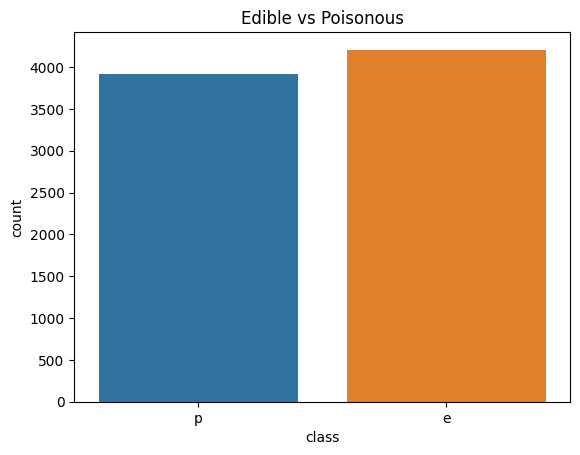

class
e    4208
p    3916
Name: count, dtype: int64

In [2]:
# Q1
# Load the dataset
df = pd.read_csv("mushrooms.csv")
df.head()
print("Shape of dataset:", df.shape)
print("Missing values:\n", df.isnull().sum())

# Count of edible vs poisonous mushrooms
sns.countplot(x='class', data=df)
plt.title("Edible vs Poisonous")
plt.show()

df['class'].value_counts()

In [3]:
# Q2
# Apply Label Encoding to all columns
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

df_encoded.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [4]:
# Q3
# Split into Train and Test
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Q4
# Train a Decision Tree Classifier using entropy
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Accuracy
train_acc = accuracy_score(y_train, clf.predict(X_train))
test_acc = accuracy_score(y_test, clf.predict(X_test))

print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Training Accuracy: 1.0
Test Accuracy: 1.0


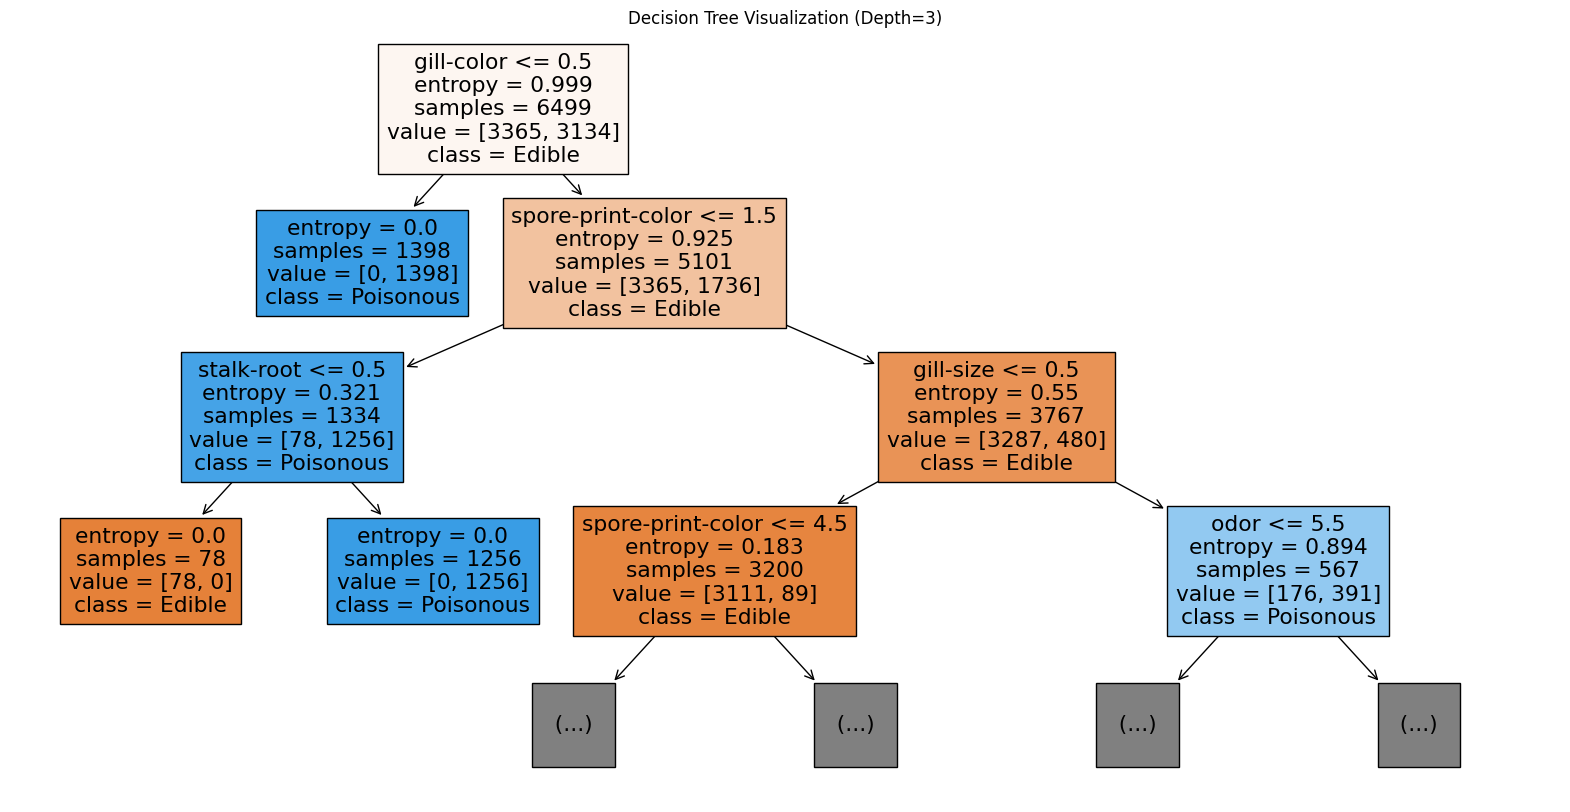

In [6]:
# Q5
# Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Edible", "Poisonous"], max_depth=3)
plt.title("Decision Tree Visualization (Depth=3)")
plt.show()


Classification Report:
               precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       843
   Poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



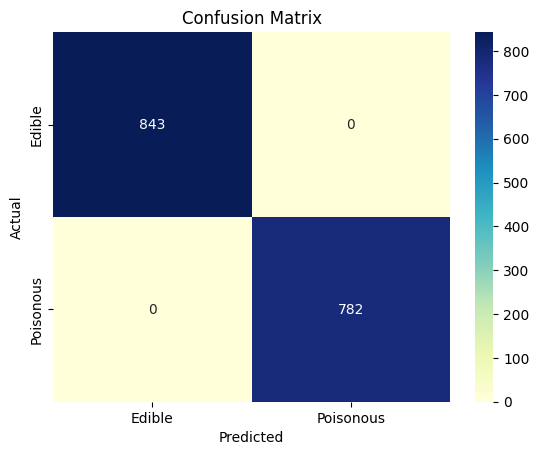

In [7]:
# Q6
# Evaluate the model
y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Edible", "Poisonous"]))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [9]:
# Q7
# Grid Search for hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate best model on test set
best_model = grid_search.best_estimator_
print("Test Accuracy after tuning:", accuracy_score(y_test, best_model.predict(X_test)))


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 1.0
Test Accuracy after tuning: 1.0


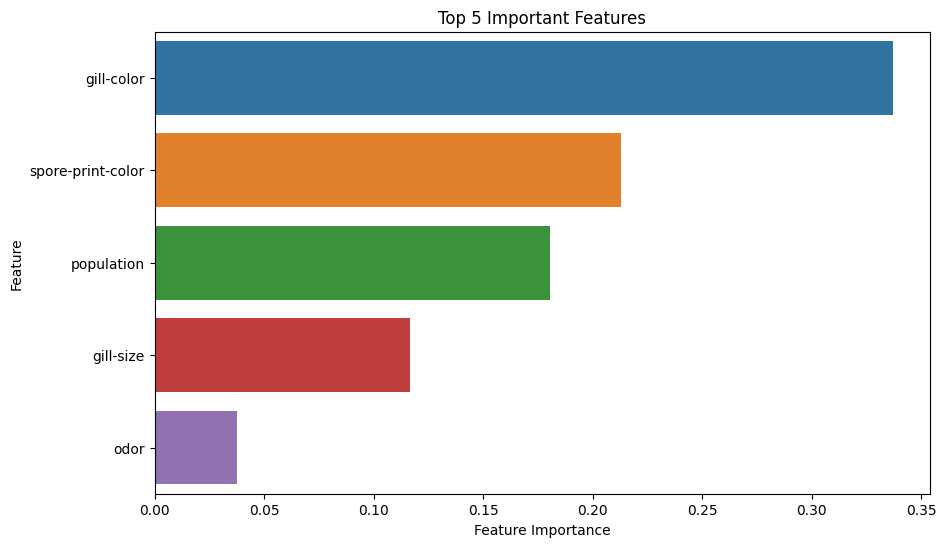

In [10]:
# Q8
# Feature Importance Plot
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Top 5 features
top_n = 5
top_features = X.columns[indices[:top_n]]
top_importances = importances[indices[:top_n]]

plt.figure(figsize=(10,6))
sns.barplot(x=top_importances, y=top_features)
plt.title("Top 5 Important Features")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()
